In [1]:
from diffusers import StableDiffusion3Pipeline
import torch

/root/sehyun/diffusers/src/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


In [17]:
import gc
gc.collect(); torch.cuda.empty_cache()
del pipe
gc.collect()
torch.cuda.empty_cache()

In [18]:
pipe = StableDiffusion3Pipeline.from_pretrained("stabilityai/stable-diffusion-3-medium-diffusers", torch_dtype=torch.float16).to(torch.device("cuda"))
pipe.load_lora_weights(f"/root/sehyun/storyboard-sketch-sd3-lora-with-classimage/checkpoint-1000")

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

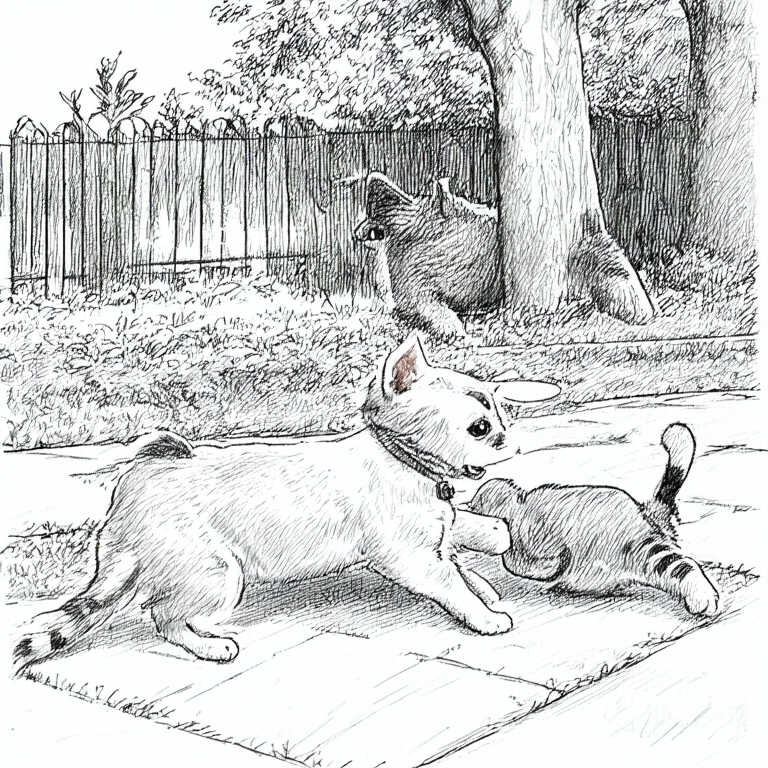

In [22]:
image = pipe("an image of dog and cat playing in the yard in sks sketch style", num_inference_steps=50, guidance_scale=5.0,  height = 768, width = 768).images[0]
display(image)

In [ ]:
image